In [4]:
import nltk 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [5]:
df=pd.read_csv("Raw_Resume.csv")
df.shape

(79, 2)

In [6]:
df.head()

,Category,Raw_Details
0,workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
1,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
2,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
3,workday,Vinay kumar .v\nWorkday Functional Consultant\...
4,workday,Srikanth (WORKDAY hCM Consultant)\t ...


In [7]:
df.sample(5)

,Category,Raw_Details
38,React Developer,HARIPRIYA BATTINA \n\nExperience as UI Develop...
29,SQL Developer,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...
13,workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
55,React Developer,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...
10,workday,Workday HCM Techno functional Consultant ...


In [8]:
df['Category'].unique()

array(['workday', 'SQL Developer', 'React Developer', 'Peoplesoft Resume',
       'Peoplesoft'], dtype=object)

In [9]:
df['Category'].value_counts()

Category
React Developer      23
workday              21
Peoplesoft Resume    20
SQL Developer        14
Peoplesoft            1
Name: count, dtype: int64

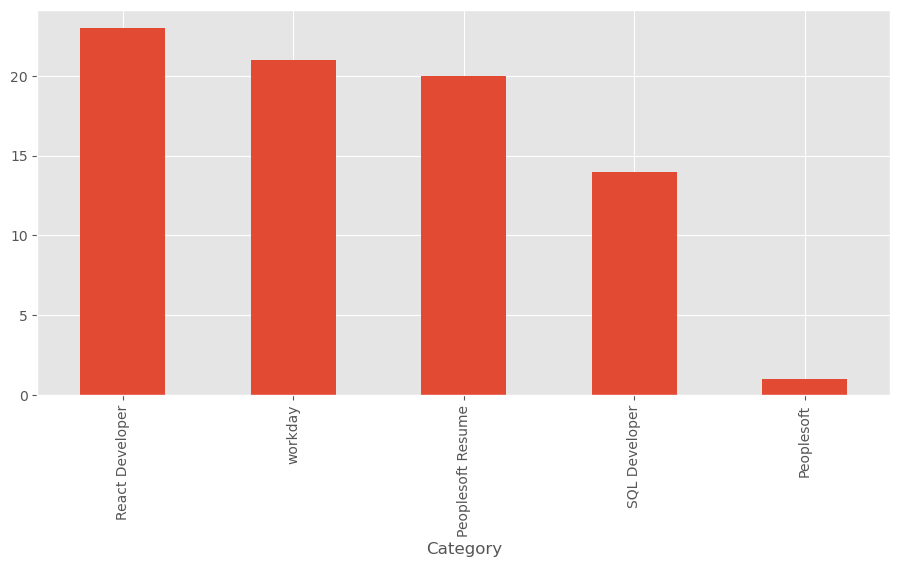

In [10]:
#Data visualization
plt.figure(figsize=(11,5))
df['Category'].value_counts().plot(kind='bar')
plt.show()

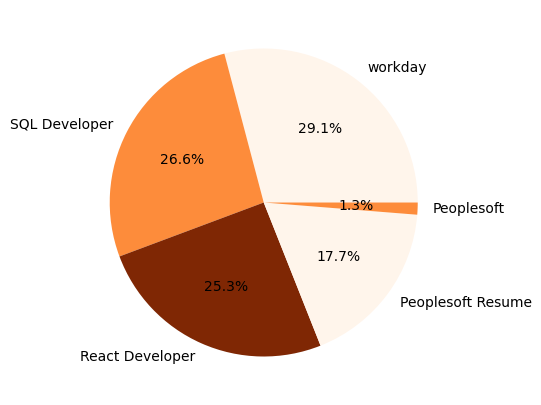

In [11]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(11,5))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [12]:
# Text cleaning using NLP
df['Raw_Details'][0]


'Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and valid

In [13]:
# Remove URL
# Remove emails
# Remove special characters
# Remove Stopwords

In [14]:
def clean(text):
    url_pattern= re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('',text)
    clean_text = email_pattern.sub('',text)
    
    clean_text = re.sub('[^\w\s]','', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text    

In [15]:
# example usage
s = 'Hello, $%& i found this # article at https://www.sanjay.com ! you can contact me at sanjay@example'

In [16]:
clean(s)

'Hello found article httpswwwsanjaycom contact sanjayexample'

In [27]:
df['Raw_Details']=df['Raw_Details'].apply(lambda x: clean(x))

In [31]:
df['Raw_Details'][0]

'Chinna Subbarayudu DOB 06th March 1994 Nationality Indian PROFILE SUMMARY around 51 years experience developing Implementation ERP technology using Workday HCM ETL informatica technologies 36 years experience Workday Integration Consultant involved maintenance implementation Experience phases Workday like requirements gathering Analysis Design Development Testing Hands experience inbound outbound integrations using core connector Workday studio managing business processes working EIB report writer Developed maintained customreport types Advanced Matrix Composite using report writer tool Involved transformation XML XSLT presenting data different web Services Building Workday Integration EIB calculated fields Custom Reports Writing XSLT transformation code Developed testing strategies validation scenarios along project Scope Requirement documents Prioritizing reproducing verifying bug fixes different Workday integrations knowledge XML WDSOAP Web Service WD REST Web Service experienced u

In [ ]:
# Encoding

In [33]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

C:\Users\Sanjay\coding\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
df['Category'].unique()

array([4, 3, 2, 1, 0])

In [43]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Raw_Details'])
resume=tfidf.transform(df['Raw_Details'])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [49]:
df['Category'].unique()

array([4, 3, 2, 1, 0])

In [51]:
x_train.shape

(63, 5412)

In [53]:
y_train.shape

(63,)

In [55]:
x_test.shape

(16, 5412)

In [57]:
y_test.shape

(16,)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of the KNN Classifier on test data->:{accuracy}")

Accuarcy of the KNN Classifier on test data->:0.9375


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier 

In [99]:
models = {
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'SVC' : SVC(),
    'MultinomialNB' : MultinomialNB(),
    'OneVsRestClassifier' : OneVsRestClassifier(KNeighborsClassifier())
}

In [101]:
accuracy_scores = {}
for model_name, model in  models.items ():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of the {model_name} on test data->:{accuracy}")

Accuarcy of the KNeighborsClassifier on test data->:0.9375
Accuarcy of the LogisticRegression on test data->:0.8125
Accuarcy of the RandomForestClassifier on test data->:0.875
Accuarcy of the SVC on test data->:0.8125
Accuarcy of the MultinomialNB on test data->:0.75
Accuarcy of the OneVsRestClassifier on test data->:0.9375


In [103]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
# example usage

In [113]:
myresume = """'Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and validation scenarios along with project Scope and Requirement documents\n\nPrioritizing, reproducing and verifying bug fixes in different Workday integrations.\n\nHaving knowledge in XML, WD-SOAP Web Service, and WD- REST Web Service and experienced in using tools such as Soap, XML Exchanger\n\nInvolved in writing transformation code for converting XML into XSLT\n\nfor different web services.\n\nPerformed validation testing and end to end testing and also involved in integration testing\n\nHaving good experiences in testing, we perform UAT and end to end validation testing\n\nKnowledge in Software Development Life Cycle process (Analysis, Design, Development, Testing) for Implementation and Support in different application domain.\n\nExperience of working in Production support model.\n\nExcellent client interaction skills and proven experience in working independently as well as in a team.\n\n\n\nTECHNICAL SKILLS:\n\n\n\n\n\n\n\nWORKDAY SKILLS\n\nWorkday HCM, Workday Advanced Report Writer, Core connectors PICOF, Document Transformation and Workday Studio, EIB, Workday Web Services, Workday Security.\n\nProgramming Languages\n\nXML, SQL, Basic shell scripting.\n\nETL tools\n\nInformatica 9 &10 ,Teradata\n\nOperating systems\n\nLinux, Windows\n\nTools\n\nSQL developer, Talend, Putty, Appworx, Maestro, Winscp\n\n\n\n\t\t\tEducation Details:\n\n\n\n\n\n\tBsc(Computers) from Yogi Vemana University,Kadapa.\n\n\t\t\tWork Experience:\n\n\n\n\n\nWorking as a Workday Technical Consultant for Progile Infotech pvt ltd  from June - 2016 to till date.        \n\n\t\t\tProjects under taken:\n\n\n\n\n\n\n\n\n\nClient: South West Airlines                                                                                   June2019- Present\n\nRole: Workday Technical  Consultant\n\n\n\nResponsibilities:\n\n\t\tIntegrations in Workday using different tools like CCW, EIB, DT, Custom Report and Workday Studio, Responsible for developing Integrations and testing them.\n\n\t\tResponsible for supporting the new change requests and enhancements in the project\n\n\t\tCreated calculated fields and Worked on Simple and Advanced Reports.\n\n\t\tWorked on Integration Systems (EIBs, Core Connectors).\n\n\t\tDay to day support of Workday Integrations, Security, and Reporting issues.\n\nHad knowledge on hire, terminate, data changes etc. of employees\n\nExpertise in developing Payroll interfaces using PICOF, PECI with the help of Workday Studio and Document Transformation to meet client’s complex payroll requirements.\n\nDesign of web services to send/receive data between Workday and Third party system.\n\nDeveloped analytics dashboards utilizing multiple data sources to provide actionable reporting and embedded analytics.\n\nExperienced in analyzing and preparing Project Deliverables such as Technical Design Document (TDD) and Functional Design Document (FDD).\n\nCreated test scripts and coordinated the testing\xa0effort with all the stakeholders for System and UAT. \n\n\n\n\n\nClient:  Arbella Insurance Group\t\t\t\t                                Dec2017– May2019\n\nRole:  Workday Integration Consultant\n\n\n\nResponsibilities:\n\nAnalyzed client’s HCM/Payroll business needs through client working sessions and supported development of new business processes and a future state design.\n\n\t\tWorked as an Integration Developer for Analysis, design, development, testing and implementation of Workday HCM solutions for Global Implementation in GE. \n\n\t\tPerformance Tuning in Population (2 lakh employees) and Complexity Perspective.\n\n\t\tCreated Multiple CCW Integrations for Demographical data with DT, EIBs with reports\n\n\t\tSupported on both Inbound and Outbound Studio Integrations, Created security groups, users and configured required security policies in Domain and BP level..\n\n\t\tUtilize in-depth knowledge of functional and Technical experience in Workday and other leading-edge products and technology in conjunction with industry and business skills to deliver solutions to customer.\n\n\t\tBuilt Integrations in Workday using different tools like CCW, EIB, and Reports. Identifying Testing strategy getting sign-off on all project deliverables.\n\n\t\tCollaborate with the ST (System Testing) and UAT (User Acceptance Testing) teams to test the integration builds. Fix issues encountered in ST and UAT phase.\n\nDeveloped Several Complex Integrations using Workday Studio and EIB.\n\nDay to day support of Workday HCM, Security, Payroll, Benefits, Compensation and Reporting issues\n\nInvolved in the design phase and prototyping for further discussions with the client.\n\nCreated and used calculated fields in reporting, business processes, integrations and other areas within Workday.\n\n\n\nClient:  News Technologies  \t\t\t          \t\t\t     June 2016 –Nov 2017\n\nRole:  Peoplesoft Consultant          \n\n\n\nResponsibilities:\n\n\n\nInvolved in design and customization of tables and panels and adding new option using People Tools.\n\nResponsible for Test Plan, Defect Report Status, and Knowledge Transfer Documents.\n\nUploading the test scripts from MS Excel to Test Director.\n\nDeveloped and executed the SQL queries to fetch the data from PeopleSoft HRMS (Oracle).\n\nThe fetched data has to be analyzed against the bridge database and it should be reported if there is any deviation.\n\nIntegrated third party hiring application with PeopleSoft System using Component Interface program and loaded data into PS tables.\n\nUnit tested the developed application and created test scripts and test cases for the Unit Testing and System Testing\n\n\t\t\tDeclaration:\n\n\n\n\n\n\t                  I hereby declare that the information provided above is true to the best of my knowledge.\n\n\n\n\n\nDate : \t\t\t\t\t\t\t\t\tName: M Chinna Subbarayudus\n\n\n\n\n\n\t\tPage 2'"""

In [121]:
df.head()

,Category,Raw_Details
0,4,Chinna Subbarayudu DOB 06th March 1994 Nationa...
1,4,convert contentdriveMyDriveResumes_Docxworkday...
2,4,convert contentdriveMyDriveResumes_Docxworkday...
3,4,Vinay kumar v Workday Functional Consultant EX...
4,4,Srikanth WORKDAY hCM Consultant Seeking suitab...


In [125]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))